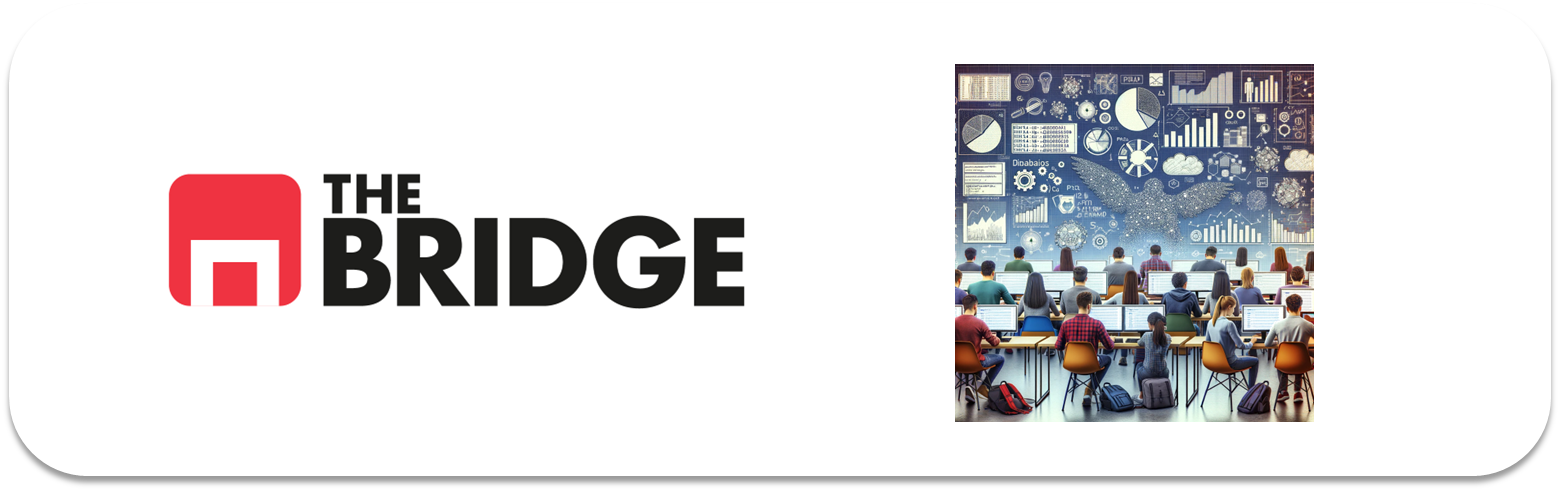

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [29]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge


In [5]:
df = pd.read_csv(".\data\hard_to_find\obligatoria_hard.csv", sep='|')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


**2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.**

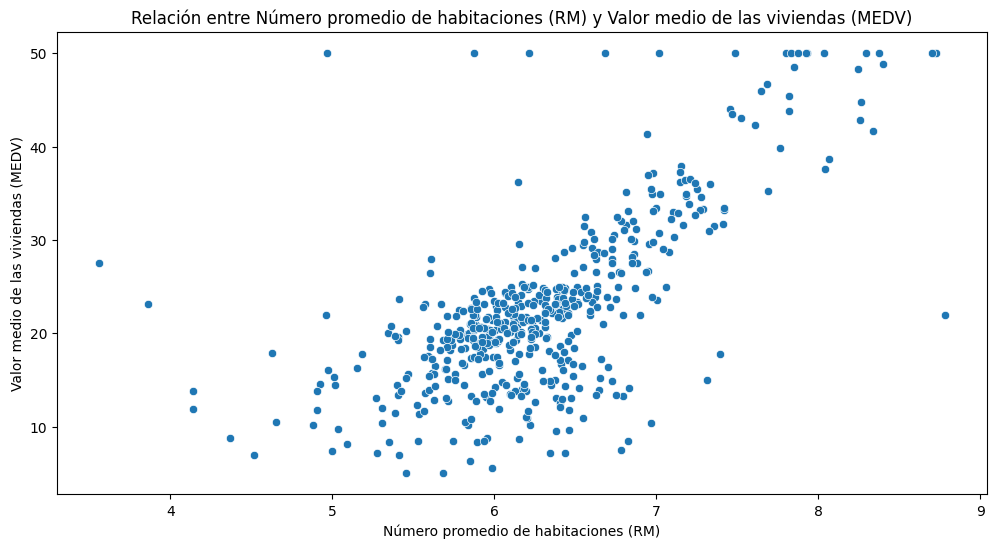

In [6]:
# Scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('Relación entre Número promedio de habitaciones (RM) y Valor medio de las viviendas (MEDV)')
plt.xlabel('Número promedio de habitaciones (RM)')
plt.ylabel('Valor medio de las viviendas (MEDV)')
plt.show()

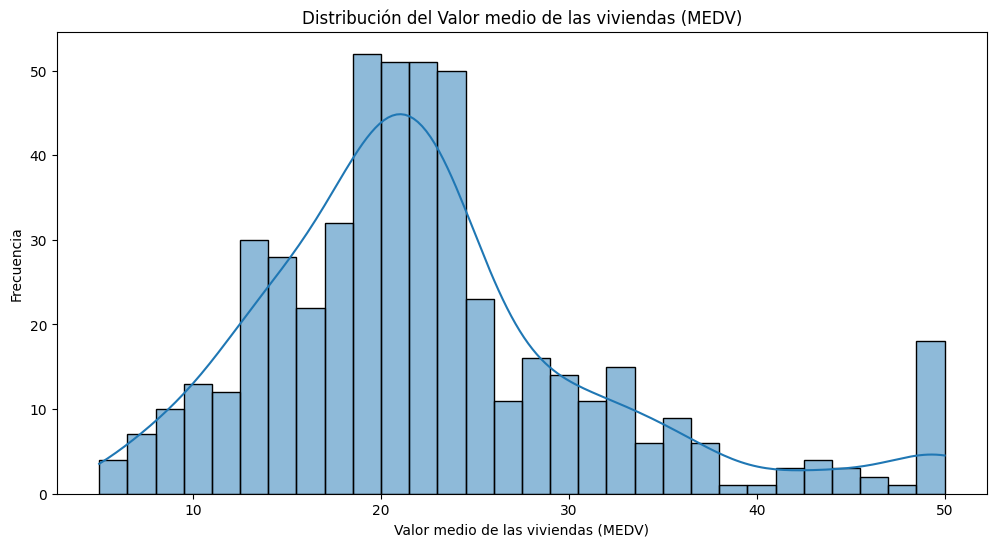

In [7]:
# Histograma

plt.figure(figsize=(12, 6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribución del Valor medio de las viviendas (MEDV)')
plt.xlabel('Valor medio de las viviendas (MEDV)')
plt.ylabel('Frecuencia')
plt.show()

**3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.**

In [10]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**4. Construye las parejas X,y de train y test**

**5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.**


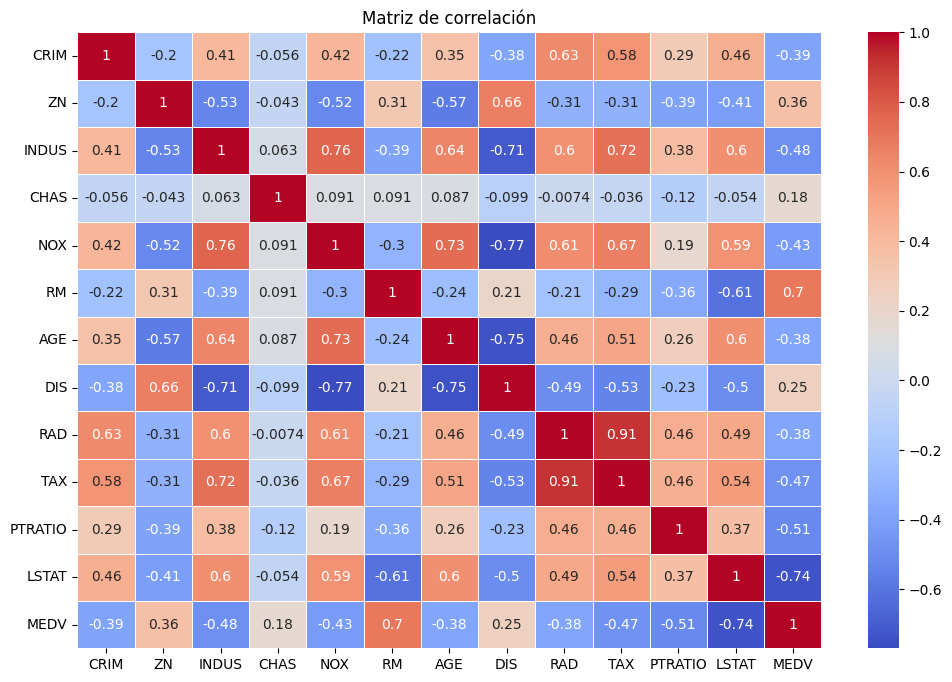

In [13]:
# Matriz de correlación 
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [20]:
# Calcular la correlación en valor absoluto con MEDV --> No quedarme solo con las más altas (positivas) sino las más altas en valor absoluto
correlation_with_target = np.abs(corr_matrix['MEDV'])

# Seleccionar las 5 características con la correlación en valor absoluto más alta
selected_features = correlation_with_target.sort_values(ascending=False).index[1:6]

# Mostrar las características seleccionadas
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX'], dtype='object')


**6. Tratamiento de variables**

In [22]:
# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**7. Construcción del modelo de regresión lineal**

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

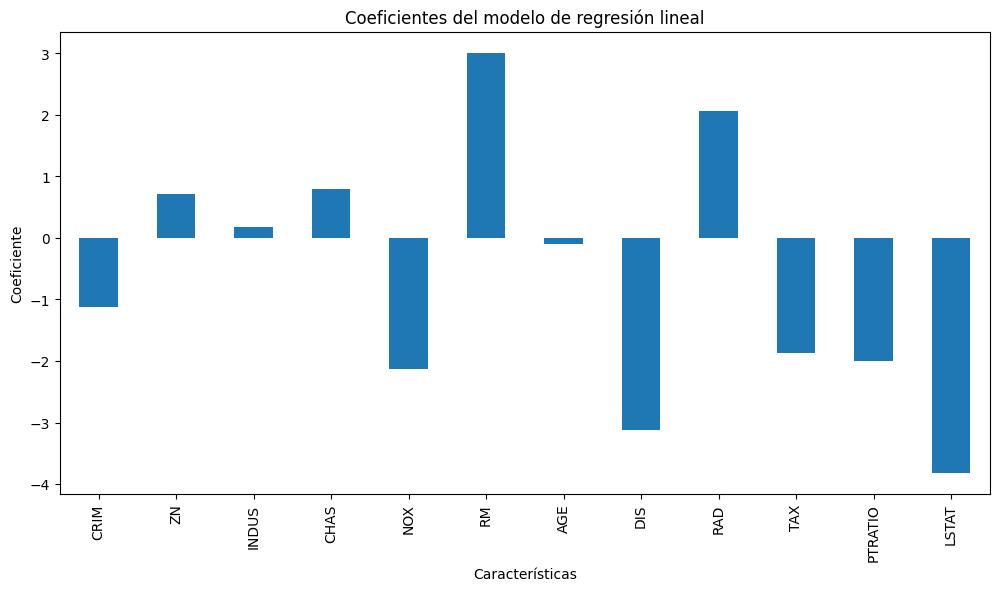

In [26]:
#Coeficientes 
coefficients = pd.Series(model.coef_, index=X.columns)

# Visualizar los coeficientes
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar')
plt.title('Coeficientes del modelo de regresión lineal')
plt.xlabel('Características')
plt.ylabel('Coeficiente')
plt.show()

**9. Evaluación del modelo y comparación con valores reales:**


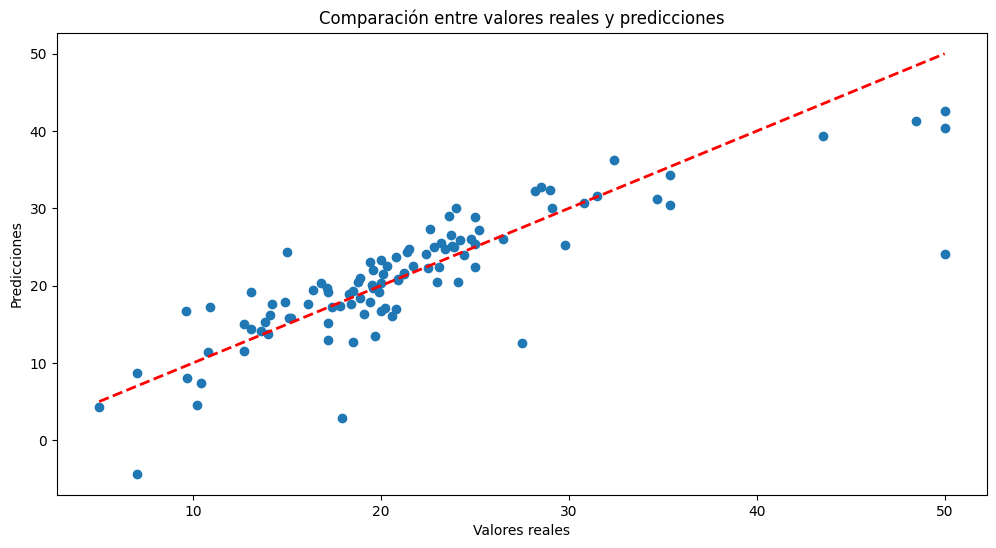

Mean Squared Error (MSE): 22.77770856386603
R-squared (R2): 0.6893967884614761


In [28]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Comparación gráfica de predicciones y valores reales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

In [30]:


# Modelo de regresión Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha

# Entrenar el modelo Ridge
ridge_model.fit(X_train_scaled, y_train)

# Evaluar el modelo Ridge
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'MSE Ridge: {mse_ridge}')
print(f'R2 Ridge: {r2_ridge}')

MSE Ridge: 22.811118721558383
R2 Ridge: 0.6889411981966277
